<a href="https://colab.research.google.com/github/020/020.github.io/blob/master/rph_bed_occupancy_ts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret-ts-alpha


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 468 kB 5.2 MB/s 
     |████████████████████████████████| 1.4 MB 56.9 MB/s 
     |████████████████████████████████| 2.0 MB 25.0 MB/s 
     |████████████████████████████████| 9.8 MB 20.9 MB/s 
     |████████████████████████████████| 79.9 MB 115 kB/s 
     |████████████████████████████████| 11.2 MB 39.4 MB/s 
     |████████████████████████████████| 303 kB 49.4 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 120 kB 57.5 MB/s 
     |████████████████████████████████| 3.3 MB 51.0 MB/s 
     |████████████████████████████████| 69 kB 6.8 MB/s 
     |████████████████████████████████| 6.5 MB 55.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 930 kB 49.8 MB/s 
     |████████████████████████████████| 34.5 MB 5.3 kB/s 
  Created wheel for pyod: filename=

In [25]:
import pandas as pd
data = pd.read_csv('/content/rph_ed_occupancy_2017.csv')
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True, drop=True)
data = data.asfreq('H')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8748 entries, 2017-01-01 00:00:00 to 2017-12-31 11:00:00
Freq: H
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ED_occupancy  8748 non-null   int64
dtypes: int64(1)
memory usage: 136.7 KB


In [27]:
data.head(12)

,ED_occupancy
datetime,
2017-01-01 00:00:00,19
2017-01-01 01:00:00,22
2017-01-01 02:00:00,30
2017-01-01 03:00:00,34
2017-01-01 04:00:00,35
2017-01-01 05:00:00,34
2017-01-01 06:00:00,37
2017-01-01 07:00:00,31
2017-01-01 08:00:00,29


In [28]:
from pycaret.time_series import *
setup(data, fh = 7, fold = 5, session_id = 123)

,Description,Value
0,session_id,123
1,Target,ED_occupancy
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(8748, 1)"
5,Train data shape,"(8741, 1)"
6,Test data shape,"(7, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,5
9,Enforce Prediction Interval,False


In [29]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Actual,Length,,8748.0
1,Summary,Statistics,Actual,Mean,,30.198331
2,Summary,Statistics,Actual,Median,,30.0
3,Summary,Statistics,Actual,Standard Deviation,,10.232883
4,Summary,Statistics,Actual,Variance,,104.711889
5,Summary,Statistics,Actual,Kurtosis,,-0.373196
6,Summary,Statistics,Actual,Skewness,,0.12807
7,Summary,Statistics,Actual,# Distinct Values,,65.0
8,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 24}",37638.262058
9,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 48}",64783.133815


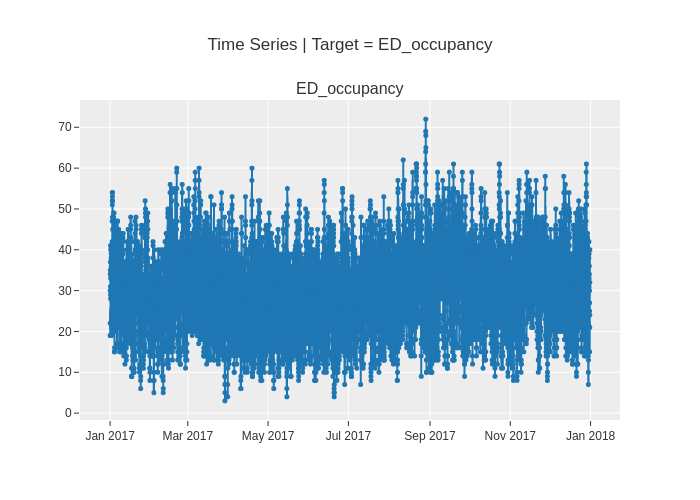

In [30]:
plot_model(plot = 'ts')

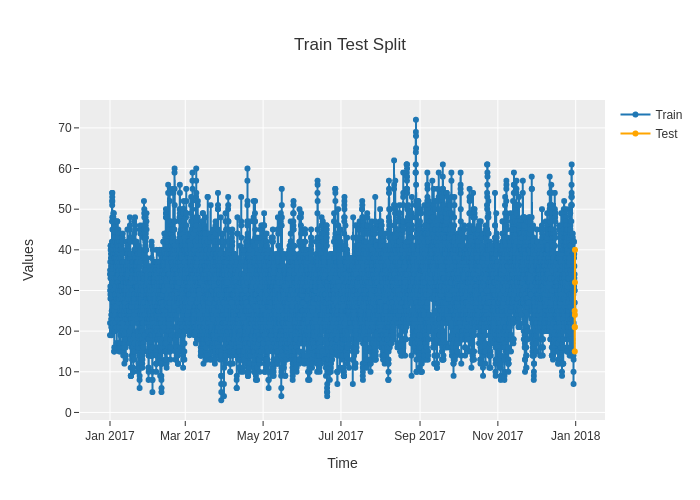

In [31]:
plot_model(plot = 'train_test_split')

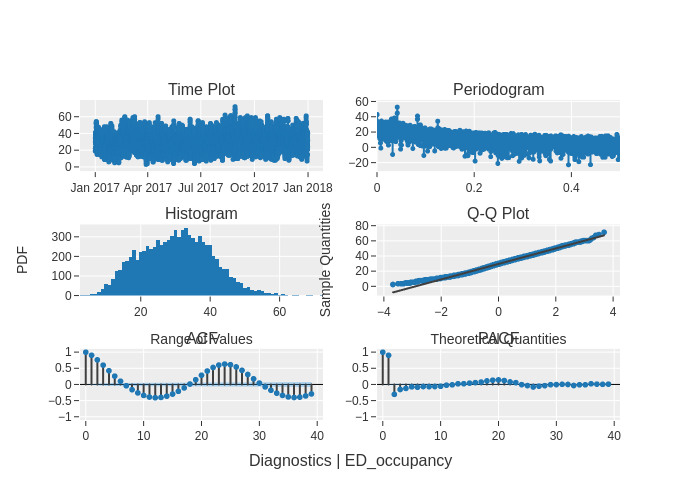

In [32]:
plot_model(plot = 'diagnostics')

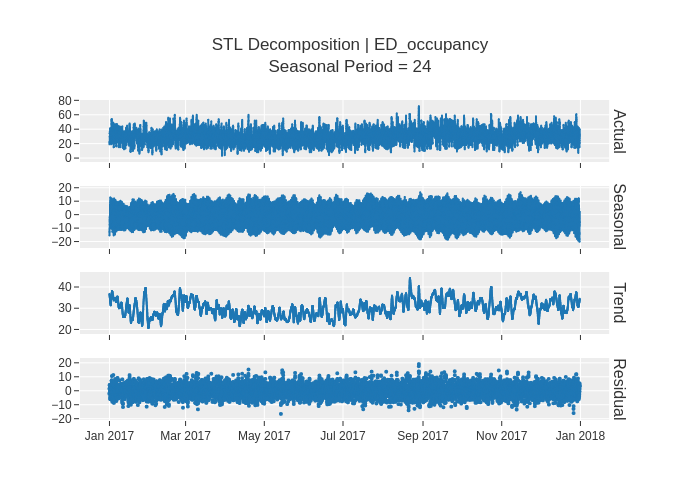

In [33]:
plot_model(plot = 'decomp_stl')

In [34]:
best = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,3.864,4.888,0.1622,0.1442,0.5587,0.5568,-0.1942,1.322
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,3.864,4.888,0.1622,0.1442,0.5587,0.5568,-0.1942,1.348
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,3.8615,4.8847,0.1622,0.1442,0.5584,0.5564,-0.1912,1.358
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,3.8693,4.8867,0.1623,0.1444,0.5595,0.5567,-0.195,1.324
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,3.7995,4.8106,0.1633,0.1445,0.5494,0.548,-0.1119,1.340
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,3.8691,4.8756,0.1646,0.1459,0.5594,0.5554,-0.1434,1.324
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,3.9099,4.9285,0.1642,0.1463,0.5654,0.5614,-0.2241,1.414
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,4.0555,5.1244,0.1699,0.1506,0.5864,0.5837,-0.2697,1.340
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,4.0576,5.1238,0.1673,0.151,0.5867,0.5837,-0.4079,7.300
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,4.0575,5.0076,0.1721,0.1538,0.5867,0.5704,-0.2096,17.220


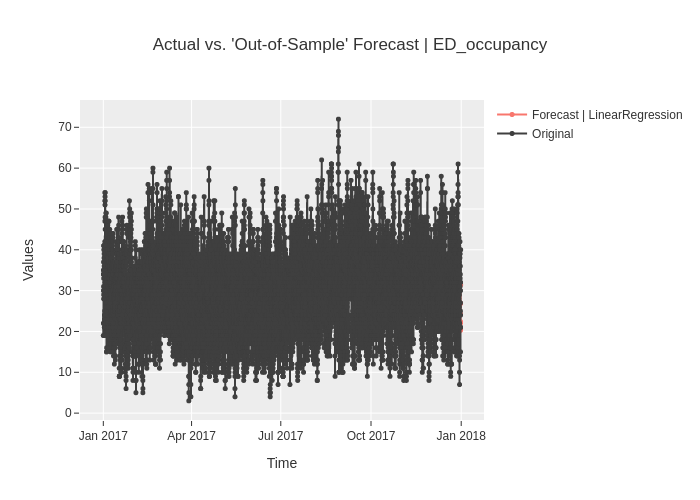

In [35]:
plot_model(best, plot = 'forecast')

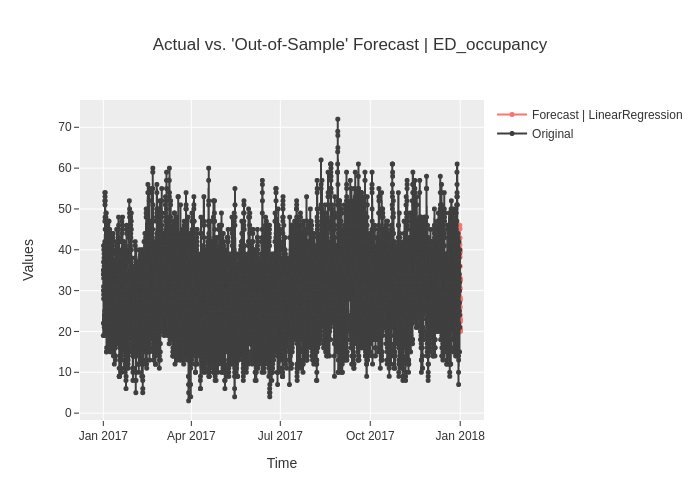

In [36]:
plot_model(finalize_model(best), plot = 'forecast', data_kwargs = {'fh' : 24})

In [40]:
predict_model(best, fh = 150)

,y_pred
2017-12-31 05:00,24.3013
2017-12-31 06:00,21.9580
2017-12-31 07:00,20.5701
2017-12-31 08:00,20.2778
2017-12-31 09:00,22.3751
...,...
2018-01-06 06:00,20.5112
2018-01-06 07:00,19.5618
2018-01-06 08:00,19.9923
2018-01-06 09:00,22.3946


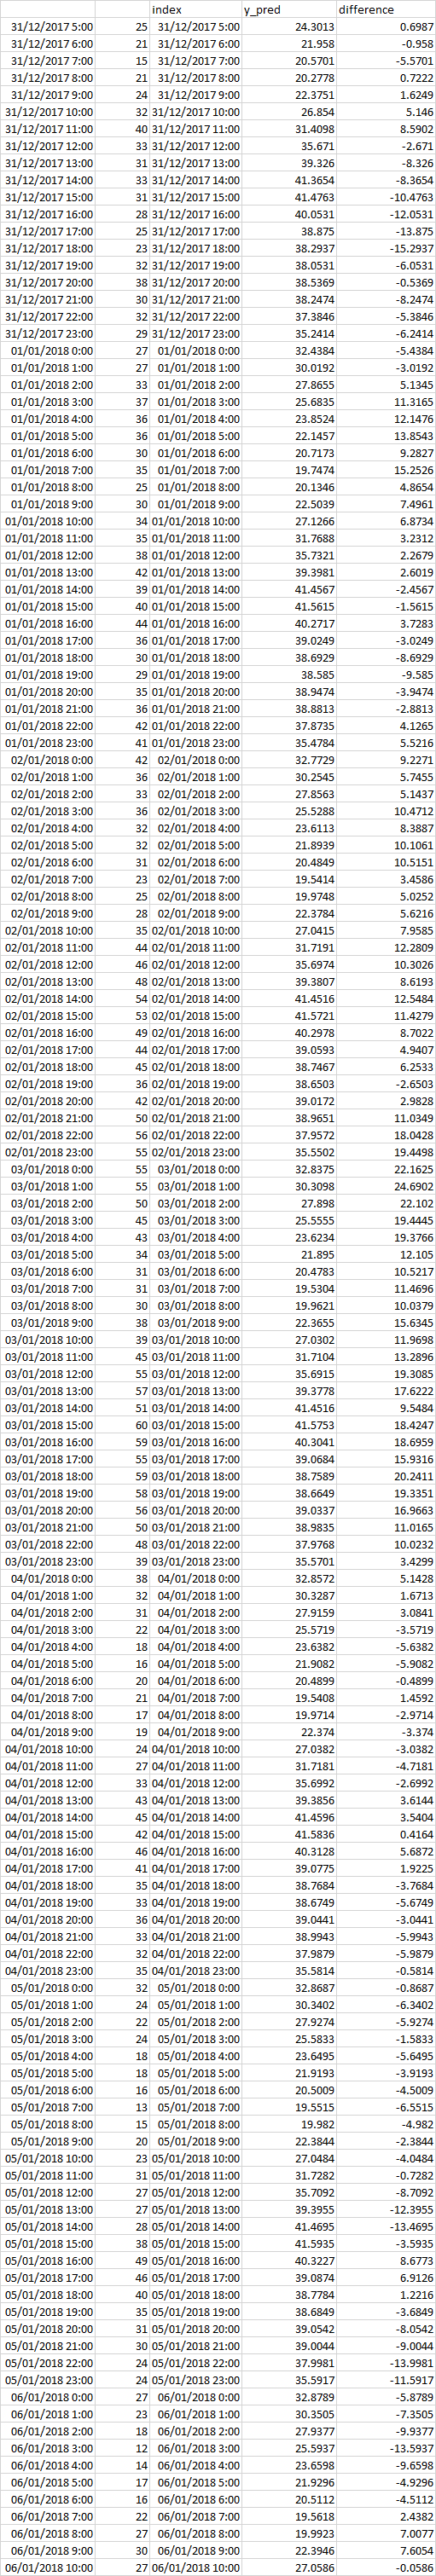